# Academic Achievement Evaluation

## Table Of Contents

* [Business Problem Statement](#business-problem-statement)
* [Objectives](#objectives)
* [Data Description](#data-description)
* [Exploratory Data Analysis](#exploratory-data-analysis)
* [Data Visualization](#data-visualization)
* [Chi-Square Test for Portuguese dataset](#chi-square-test-for-portuguese-dataset)
* [Chi-Square Test for the Math Language](#chi-square-test-for-math-dataset)
* [Results](#results)

<a name="business-problem-statement"></a>
# Business Problem Statement:

The aim of this undertaking is to explore student data thoroughly, aiming to reveal insights that contribute to a better understanding and prediction of student success across various academic periods. As a participant, you will investigate the correlation between student grades and a diverse range of demographic, social, and school-related factors. The findings from your analysis will significantly contribute to our capacity to recognize and tackle pivotal influences on student performance.

<p align="center">
  <img src="https://www.povertyactionlab.org/sites/default/files/styles/full_evaluation_image/public/515.jpg?itok=vexIauIF" alt="AeroFit Treadmill">
</p>


<a name="objectives"></a>
# Objectives:

Correlation Examination:
Identify the factors exhibiting the strongest correlation with student grades.

Predictive Model Development:
Construct a model capable of forecasting a student's final grade by considering their background and school-related activities.

Insight Generation:
Present actionable insights for educational institutions to enhance student outcomes, drawing from the discoveries in your analysis.

<a name="data-description"></a>
# Data Description:

The datasets, student-mat.csv and student-por.csv, encompass the following information:

School: The educational institution attended by the student.
Sex: Gender of the student.
Age: Age of the student.
Address: Urban or rural area of residence.
Medu & Fedu: Education levels of the student's parents.
Studytime: Weekly study time.
Failures: Count of past class failures.
G1, G2, G3: Grades obtained in the first, second, and final periods.

<a name="exploratory-data-analysis"></a>
# Exploratory Data Analysis: 
    Incorporating required libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

 loading two datasets and showing the initial rows of one of them for inspection.

In [2]:
# Loading datasets
mathematics_data = pd.read_csv('student-mat.csv', sep=';')
portuguese_data = pd.read_csv('student-por.csv', sep=';')

# Displaying the first few rows of each dataset for an initial overview
mathematics_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


<a name="data-visualization"></a>
# Data Visualization :

Visualising and analysis using the Seaborn and Matplotlib libraries. It includes the following key elements:

**Aesthetic Style Setting:**
    Sets the aesthetic style of the plots using Seaborn to a white grid background.

**Function Definition for Plotting:**
    Defines a function named generate_plots that creates histograms and boxplots for specified columns in a given dataset.
    Utilizes Matplotlib to create subplots based on the specified number of columns and a fixed figure size.
    Iterates through the specified columns, creating histograms and boxplots for each.
    Titles each subplot appropriately with the column name and dataset name.

**Column Selection:**
    Specifies columns of interest for analysis in both datasets as 'age', 'studytime', 'failures', 'G1', 'G2', and 'G3'.
    
**Plotting for Mathematics Dataset:**
    Invokes the generate_plots function to generate histograms and boxplots for the specified columns in the 'Mathematics' dataset (mathematics_data).

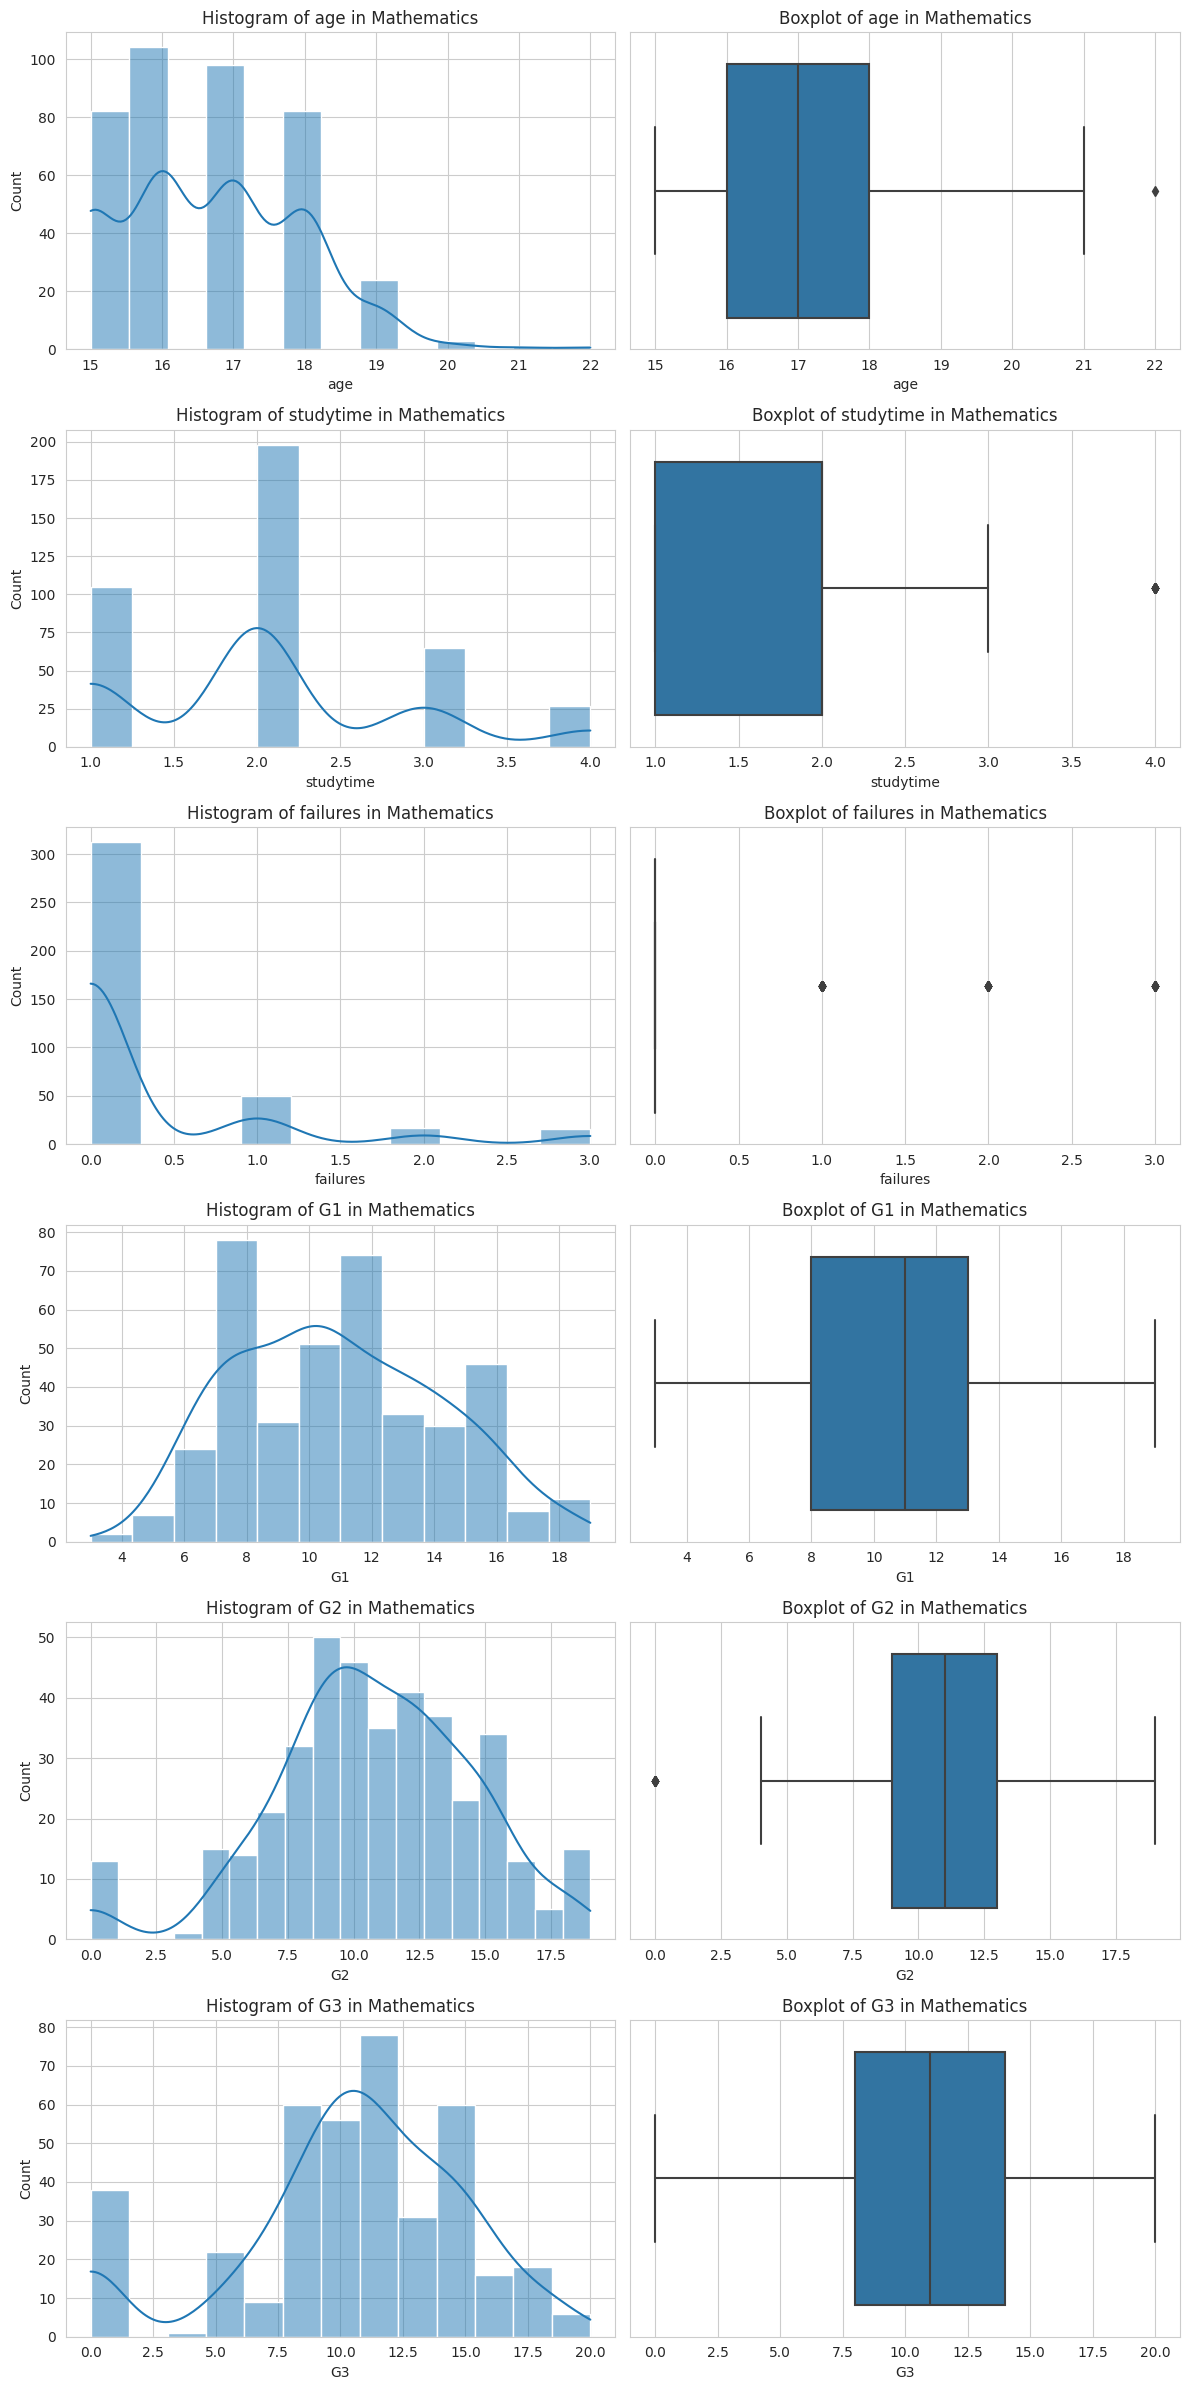

In [3]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Defining a function to create histograms and boxplots for specified columns
def generate_plots(data, columns, dataset_name):
    fig, axes = plt.subplots(len(columns), 2, figsize=(12, 4 * len(columns)))
    for i, col in enumerate(columns):
        # Histogram
        sns.histplot(data[col], kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Histogram of {col} in {dataset_name}')
        # Boxplot
        sns.boxplot(x=data[col], ax=axes[i, 1])
        axes[i, 1].set_title(f'Boxplot of {col} in {dataset_name}')
    plt.tight_layout()


# Columns of interest for both datasets
columns_of_interest = ['age', 'studytime', 'failures', 'G1', 'G2', 'G3']

# Plotting for Mathematics dataset
generate_plots(mathematics_data, columns_of_interest, 'Mathematics')

extends the data visualization and analysis to the 'Portuguese' dataset using the same plotting function:

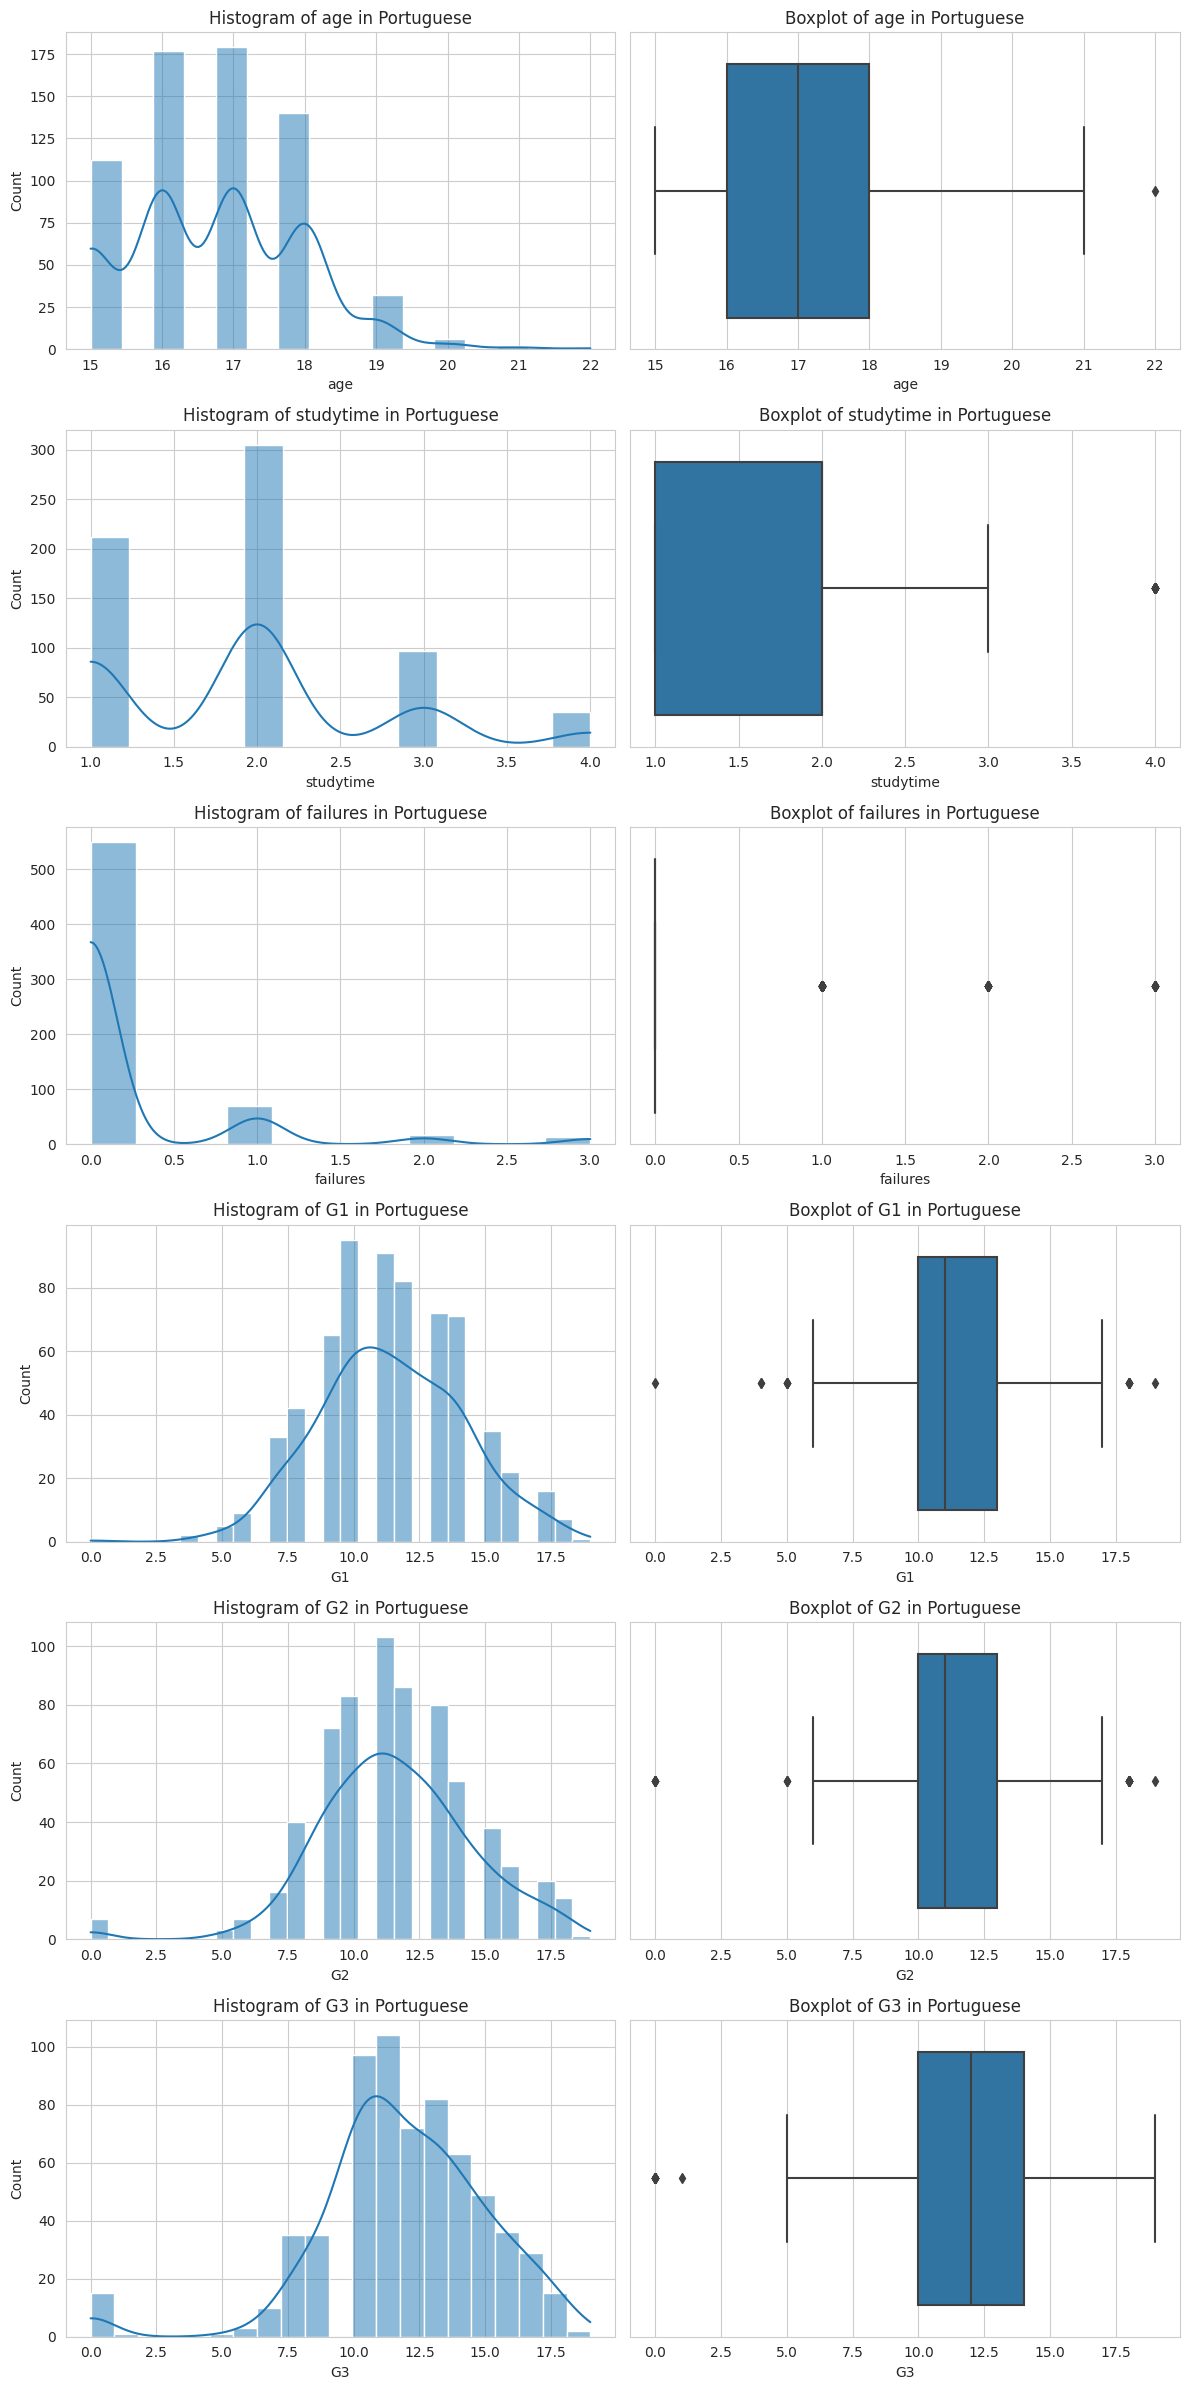

In [4]:

# Plotting for Portuguese dataset
generate_plots(portuguese_data, columns_of_interest, 'Portuguese')

<a name="chi-square-test-for-portuguese-dataset"></a>
# Chi-Square Test for Portuguese dataset :

performs a Chi-Square Test for independence and result interpretation through the following steps:

**Defining a Chi-Square Test Function:**

    Creates a function named conduct_chi_square_test that takes a dataset and two categorical columns as input.
    Constructs a contingency table using Pandas' crosstab function.
    Performs the Chi-Square Test using chi2_contingency from the SciPy library.
    Interprets the test result by checking if the p-value is less than 0.05, indicating statistical significance.
    Returns the Chi-Square statistic, p-value, and a boolean indicating significance.
**Aspects to Test:**

    Specifies aspects to test as a dictionary, where each aspect is associated with two columns for analysis (e.g., gender and final grades).

**Performing the Tests for Portuguese Dataset:**

    Applies the defined function to perform Chi-Square Tests for the specified aspects in the 'Portuguese' dataset (portuguese_data).
    Stores the results in a dictionary (port_chi_square_results) with each aspect linked to its corresponding Chi-Square statistics, p-value, and significance.

In [5]:

# Defining a function to perform the Chi-Square Test and interpret results
def conduct_chi_square_test(data, col1, col2):
    # Creating a contingency table
    contingency_table = pd.crosstab(data[col1], data[col2])
    # Performing the Chi-Square Test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # Interpreting the result
    is_significant = p < 0.05  # 5% significance level
    return chi2, p, is_significant

# Aspects to test
aspects_to_test = {
   'Gender and Academic Performance': ('sex', 'G3'),
'Internet Access and Grades': ('internet', 'G3'),
'Family Educational Background and Performance': ('Medu', 'G3')
}

# Performing the tests for Portuguese dataset
port_chi_square_results = {aspect: conduct_chi_square_test(portuguese_data, *columns) for aspect, columns in aspects_to_test.items()}


<a name="chi-square-test-for-math-dataset"></a>
# Chi-Square Test for the Math Language :

**Additional Aspects to Test:**

    Defines a dictionary named additional_aspects_to_test specifying additional aspects to analyze.
    Each aspect is associated with two columns for Chi-Square Tests (e.g., 'School Support and Academic Performance' with columns 'schoolsup' and 'G3').

**Performing Additional Tests for Mathematics Dataset:**

    Utilizes the previously defined conduct_chi_square_test function to perform Chi-Square Tests for each additional aspect in the 'Mathematics' dataset (mathematics_data).
    Stores the results in a dictionary named additional_math_chi_square_results, where each aspect is linked to its respective Chi-Square statistics, p-value, and significance.

In [7]:

# Additional aspects to test in the Mathematics dataset
additional_aspects_to_test = {
'School Support and Academic Performance': ('schoolsup', 'G3'),
'Family Support and Grades': ('famsup', 'G3'),
'Extra-Curricular Activities and Performance': ('activities', 'G3'),
'Romantic Relationships and Academic Performance': ('romantic', 'G3'),
'Health Status and Grades': ('health', 'G3')
}

# Performing the additional tests for Mathematics dataset
additional_math_chi_square_results = {aspect: conduct_chi_square_test(mathematics_data, *columns) for aspect, columns in additional_aspects_to_test.items()}
additional_math_chi_square_results

{'School Support and Academic Performance': (32.51747698036442,
  0.012967250942184287,
  True),
 'Family Support and Grades': (13.691883206082325, 0.688779619694134, False),
 'Extra-Curricular Activities and Performance': (15.476362071640207,
  0.5612107675941844,
  False),
 'Romantic Relationships and Academic Performance': (30.172481594103168,
  0.02512766406485856,
  True),
 'Health Status and Grades': (69.21650199423279, 0.43611751736038123, False)}

# Results

**School Support and Academic Performance:** The Chi-Square value is 32.52 with a p-value of 0.013, indicating a significant association between school support services and student grades.

**Family Support and Grades:** The Chi-Square value is 13.69 with a p-value of 0.69, suggesting no significant impact of family support on academic performance.

**Extra-Curricular Activities and Performance:** The Chi-Square value is 15.48 with a p-value of 0.56, indicating no significant effect of participation in extra-curricular activities on grades.

**Romantic Relationships and Academic Performance:** The Chi-Square value is 30.17 with a p-value of 0.025, showing a significant association between being in a romantic relationship and student grades.

**Health Status and Grades:** The Chi-Square value is 69.22 with a p-value of 0.44, suggesting no significant impact of health status on academic performance.

These results reveal significant associations in the Mathematics dataset between academic performance and both school support services and romantic relationships. Other factors such as family support, extra-curricular activities, and health status do not show a significant impact on grades.

**Final Insights**

*Actionable Insights*

- **School Support:** Significant positive impact on Mathematics grades suggests that strengthening school support services could enhance student performance.

- **Romantic Relationships:** The significant association with grades in Mathematics implies the need for guidance and counseling services that help students balance personal life with academic demands.

*Statistical Significance:*

The Chi-Square Tests revealed significant relationships in specific areas, notably in the influence of school support and romantic relationships on Mathematics grades, and the impact of family educational background on Portuguese language grades.

*Recommendations*

- **Enhance School Support:** Schools should consider expanding their support services, focusing on academic counseling and tutoring, especially for Mathematics.

- **Counseling Services:** Implement programs that offer guidance on managing personal relationships alongside academic responsibilities.

- **Parental Involvement:** Encourage parental involvement, especially in households with a lower educational background, to positively influence students’ performance in Portuguese language.

*Future Research*

- **Longitudinal Studies:** To better understand the long-term effects of these factors on academic performance.

- **Qualitative Research:** Interviews and focus groups with students could provide deeper insights into the impact of personal and social factors on their academic life.

- **Comparative Studies:** Comparing these findings with other educational systems or age groups could offer a broader perspective on the influence of these factors on student achievement.